### **Основные модули PyTorch:**
* torch.nn
    * torch.nn.DataParallel
* torch.distributed
* torch.optim
* torch.utils
    * torch.utils.data
        * Классы: DataSet, DataLoader
* torch.autograd
* torchvision

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
torch.__version__

'1.10.2'

### **Тензоры**

In [4]:
a = torch.tensor(7) # скаляр, 0-dimensions
print(a)

tensor(7)


In [38]:
a2 = torch.tensor(9).item()  # получение значения скаляра
print(a2)

9


In [5]:
b = torch.tensor([1,3,5,7]) # 1-dimension
print(b)

tensor([1, 3, 5, 7])


In [6]:
c = torch.tensor([[1,3,5,7,9], [2,4,6,8,0]]) # 2-dimensions
print(c)

tensor([[1, 3, 5, 7, 9],
        [2, 4, 6, 8, 0]])


In [7]:
d = torch.tensor([[[1,2,3],[4,5,6]],[[11,12,13],[14,15,16]]]) # 3-dimensions
print(d)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[11, 12, 13],
         [14, 15, 16]]])


In [8]:
a = torch.ones(4)
print(a)

tensor([1., 1., 1., 1.])


In [9]:
b = torch.zeros(6)
print(b)

tensor([0., 0., 0., 0., 0., 0.])


In [40]:
c = torch.tensor([1,2,3,4,5])
print(c)

tensor([1, 2, 3, 4, 5])


In [11]:
d1 = torch.rand(2,2) # тензор случайных чисел размерности 2x2
print(d1)

tensor([[0.0373, 0.5573],
        [0.3250, 0.7951]])


In [12]:
d = torch.randn(3,3)   # тензор случайных чисел (нормальное распределение) размерности 3x3
print(d)

tensor([[ 1.6478,  0.9908,  0.6877],
        [-3.0446, -1.5172, -0.3388],
        [ 1.9928, -1.2252,  1.8098]])


In [13]:
e = torch.linspace(10,30,15)  # тензор от 10 до 30 из 15 чисел, между числами равное расстояние
print(e)

tensor([10.0000, 11.4286, 12.8571, 14.2857, 15.7143, 17.1429, 18.5714, 20.0000,
        21.4286, 22.8571, 24.2857, 25.7143, 27.1429, 28.5714, 30.0000])


In [14]:
a = torch.ones(2,3,5)  # размерность 2x3x5
print(a) 

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [15]:
i = torch.eye(5)   # матрица идентичности
print(i)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


In [16]:
a = torch.tensor([[[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]],[[21,22,23,24,25],[26,27,28,29,30],[31,32,33,34,35]]])

In [17]:
print(a.shape)  # размерность тензора

torch.Size([2, 3, 5])


In [57]:
r = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(r)
print(r.reshape(1, 6))   # изменение размерностей

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3, 4, 5, 6]])


In [58]:
print(r.reshape(-1, 2))  # -1 указывает на авто подбор количества элементов в первой размерности, сравни пример ниже!

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [59]:
print(r.reshape(1, 2))   # здесь ошибка, 1 - явно указана первая размерность, итог (1*2 = 2 элемента) должно быть 6!

RuntimeError: shape '[1, 2]' is invalid for input of size 6

In [18]:
print(c[2])

tensor(3)


In [19]:
print(a[1])

tensor([[21, 22, 23, 24, 25],
        [26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35]])


In [20]:
print(a[1,0,4])

tensor(25)


In [21]:
print(a[:])

tensor([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10],
         [11, 12, 13, 14, 15]],

        [[21, 22, 23, 24, 25],
         [26, 27, 28, 29, 30],
         [31, 32, 33, 34, 35]]])


In [22]:
print(a[0,1:,2:4])   # срезы для трех размерностей

tensor([[ 8,  9],
        [13, 14]])


In [23]:
t = torch.tensor([1,2,3,4,5], dtype=torch.float64)   # указание типа данных
print(t)

tensor([1., 2., 3., 4., 5.], dtype=torch.float64)


In [24]:
t_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')  # тензор для CPU
# tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')  # тензор для GPU

#### Арифметические операции над тензорами

In [25]:
t1 = torch.tensor([1,2,3,4,5])
t2 = torch.tensor([11,12,13,14,15])

In [26]:
print(t1+t2)

tensor([12, 14, 16, 18, 20])


In [27]:
print(t2-t1)

tensor([10, 10, 10, 10, 10])


In [28]:
print(t1*2)

tensor([ 2,  4,  6,  8, 10])


In [29]:
t5 = torch.tensor([[1,2,3],[4,5,6]])
t6 = torch.tensor(5)
print(t5*t6)

tensor([[ 5, 10, 15],
        [20, 25, 30]])


In [30]:
print(t2 / 3)

tensor([3.6667, 4.0000, 4.3333, 4.6667, 5.0000])


In [31]:
print(t2 / t1)

tensor([11.0000,  6.0000,  4.3333,  3.5000,  3.0000])


In [32]:
print(t2 % 3)

tensor([2, 0, 1, 2, 0])


In [33]:
# Умножение матриц
t3 = torch.tensor([[2],[4],[6],[8],[0]])
t4 = torch.tensor([[1,2,3,4,5]])
print(torch.mm(t3, t4))                 # (5x1)*(1x5) = 5x5

tensor([[ 2,  4,  6,  8, 10],
        [ 4,  8, 12, 16, 20],
        [ 6, 12, 18, 24, 30],
        [ 8, 16, 24, 32, 40],
        [ 0,  0,  0,  0,  0]])


In [34]:
print(torch.sin(t1))     # также cos, tan

tensor([ 0.8415,  0.9093,  0.1411, -0.7568, -0.9589])


In [35]:
# расчет производной в точке x
x = torch.tensor([1.5], requires_grad=True).float()  # точка x, отслеживание градиентов в тензоре 
y = x**2   # парабола
y.backward()
print(x.grad)

tensor([3.])


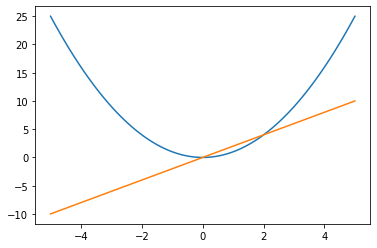

In [36]:
# расчет производной в точках
x = torch.linspace(-5,5,100,  requires_grad=True).float()
y = x**2
xn = x.detach().numpy()
yn = xn**2

# function
fig, ax = plt.subplots()
ax.plot(xn, yn)
# derivative function
y.backward(torch.ones_like(y))
xd = x.grad.detach().numpy()
ax.plot(xn, xd)

### Функции применимые к тензорам

In [44]:
a = torch.rand(6,6)
print(a)
print(a.max())           # максимальный элемент
print(a.max().item())    # значение
print(a.argmax().item()) # значение индекса максимального элемента

tensor([[0.6935, 0.0416, 0.2711, 0.8617, 0.5135, 0.1037],
        [0.7548, 0.3679, 0.7392, 0.1543, 0.6249, 0.7748],
        [0.1994, 0.8422, 0.2610, 0.0664, 0.6224, 0.6686],
        [0.0170, 0.2343, 0.6072, 0.5088, 0.2412, 0.9335],
        [0.6409, 0.6917, 0.9349, 0.0330, 0.2880, 0.3101],
        [0.7597, 0.5446, 0.9669, 0.2313, 0.6460, 0.3247]])
tensor(0.9669)
0.9669411778450012
32


In [48]:
# изменение размера
b = torch.randn(5,4,2)
print(b)
b = b.permute(2,1,0)   # указать по индексам
print(b)

tensor([[[ 0.1763, -1.3824],
         [-0.0982,  0.2172],
         [-0.7888,  0.0776],
         [ 0.1917, -1.3143]],

        [[-0.0239,  1.6421],
         [ 0.0026, -0.4804],
         [ 1.1101,  0.3640],
         [ 0.7545,  0.9978]],

        [[ 0.0741,  0.9124],
         [-0.5444, -1.9301],
         [-1.6596, -1.7160],
         [ 0.1296, -0.8660]],

        [[ 0.1991,  0.9172],
         [ 2.1126, -0.5568],
         [-0.2204, -0.1752],
         [-0.1131,  0.1206]],

        [[ 1.5923,  2.0426],
         [ 0.7942,  0.4707],
         [ 1.0939,  0.1272],
         [ 0.2721,  0.1248]]])
tensor([[[ 0.1763, -0.0239,  0.0741,  0.1991,  1.5923],
         [-0.0982,  0.0026, -0.5444,  2.1126,  0.7942],
         [-0.7888,  1.1101, -1.6596, -0.2204,  1.0939],
         [ 0.1917,  0.7545,  0.1296, -0.1131,  0.2721]],

        [[-1.3824,  1.6421,  0.9124,  0.9172,  2.0426],
         [ 0.2172, -0.4804, -1.9301, -0.5568,  0.4707],
         [ 0.0776,  0.3640, -1.7160, -0.1752,  0.1272],
         [-1.314

## Однослойная нейронная сеть

In [37]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

inputs_layer = torch.randn((1,10)) # входной слой - матрица 1x10
weights = torch.randn((1,10))      # веса - матрица 1x10
b = 1   # смещение

weights_reshape = weights.reshape(10,1)  # изменение формы матрицы к 10x1 для следующего умножения, 
                                         # либо транспонирование матрицы weights.T

output = sigmoid(torch.mm(inputs_layer, weights_reshape)+b) # выходной нейрон
print(output)

tensor([[0.4051]])


## Шаг 1. Набор данных

In [ ]:
import torchvision
from torchvision import transforms
train_data_path = "./train/"              # путь к тренировочным изображениям 
test_data_path = "./test/"                # путь к тестовым изображениям

transforms = transforms.Compose([
    transforms.Resize(64),      # масштабирование всех изображений в 64x64
    transforms.ToTensor(),      # перевод в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.405], std=[0.229, 0.224, 0.225])  # нормализация
])

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=transform)

## Шаг 2. Загрузчик данных

In [ ]:
batch_size = 64
train_data_loader = data.DataLoader(train_data, batch_size=batch_size)
test_data_loader = data.DataLoader(test_data, batch_size=batch_size)

## Шаг 3. Нейронная сеть со слоями

In [ ]:
class NeuNet(nn.Module):
    def __init__(self):
        super(Net, self).__init__()       # конструктор суперкласса
                                          # создание слоев
        self.fc1 = nn.Linear(12288, 84)   # 12288 = 64*64*3 (трехмерный ранее преобразовали в одномерный тензор)
                                          # входной слой, на выходе 84 нейрона
        self.fc2 = nn.Linear(84, 50)      # вход - 84 нейрона, выход - 50
        self.fc3 = nn.Linear(50, 2)       # вход - 50 нейронов, выход - 2
        
    def forward(self):
        x = x.view(-1, 12288)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x
    
exemple = NeuNet()

## Шаг 4. Оптимизатор

Обучение сети включает в себя передачу данных через сеть, использование функции потерь для определения 
разности между прогнозом и фактической маркировкой, а затем использование этой информации для обновления 
весов сети, чтобы возврат функции потерь был как можно меньше. Для выполнения обновлений в нейронной сети 
используется оптимизатор.

In [ ]:
import torch.optim as optim
...
optimizer = optim.Adam(exemple.parameters(), lr=0.001) # оптимизатор Adam, lr - скорость обучения
...

## Шаг 5. Обучение

In [ ]:
for epoch in range(epochs):               # по эпохам
    for batch in train_loader:            # по частям (пакетами) обучающей выборки 
        optimizer.zero_grad()             # обнуление градиентов на каждой итерации
        input, target = batch
        output = model(input)             # через модель нейронной сети 
        loss = loss_fn(output, target)    # функция потерь (на вход полученные данные и целевые данные)
        loss.backward()                   # расчет градиентов
        optimizer.step()                  # расчет новых весов на основе полученных градиентов

### ШАГ 6. ИТОГ
````python
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"): 
    for epoch in range(epochs): 
        training_loss = 0.0 
        valid_loss = 0.0 
        model.train() 
        for batch in train_loader: 
            optimizer.zero_grad() 
            inputs, target = batch 
            inputs = inputs.to(device) 
            target = targets.to(device) 
            output = model(inputs) 
            loss = loss_fn(output, target) 
            loss.backward() 
            optimizer.step() 
            training_loss += loss.data.item() 
            training_loss /= len(train_iterator) 
            model.eval() 
            num_correct = 0 
            num_examples = 0 
        for batch in val_loader: 
            inputs, targets = batch 
            inputs = inputs.to(device) 
            output = model(inputs) 
            targets = targets.to(device) 
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() 
            correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], target).view(-1) 
            num_correct += torch.sum(correct).item() 
            num_examples += correct.shape[0] 
            valid_loss /= len(valid_iterator) 
        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.
        format(epoch, training_loss, valid_loss, num_correct / num_examples)) 

# torch.nn.CrossEntropyLoss() - сама функция потерь 
train(exemple, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, test_data_loader, device)
````

## Шаг 7. Прогнозирование

In [ ]:
...
img = transform(img)
prediction = exemple(img)
...

# Сверточные нейроные сети

Идея свёрточных нейронных сетей заключается в чередовании свёрточных слоёв (англ. convolution layers) и субдискретизирующих слоёв (англ. subsampling layers или англ. pooling layers, слоёв подвыборки). Структура сети — однонаправленная (без обратных связей), принципиально многослойная. Для обучения используются стандартные методы, чаще всего метод обратного распространения ошибки. Функция активации нейронов (передаточная функция) — любая, по выбору исследователя.

#### Свертки в PyTorch

___
**Conv2d - двумерная свертка**  
  
Синтаксис: **nn.Conv2d(in_ch, out_ch, kern_size, stride, padding)**  
**in_ch** - количество входных каналов (для RGB - это 3)   
**out_ch** - количество выходных каналов (количество фильтров в слое)  
**kern_size** - размер ядра (фильтра) (либо кортеж, либо скаляр задающий квадрат)  
**stride** - на какое количество шагов продвигаться ядром при свертке, для создания карты признаков. Можно передать кортеж *(a, b)* - что позволяет перемещать ядро на *a* поперек и *b* вниз на каждой итерации  
**padding** - отступ от краев, можно также передать кортеж (height, weight)

___
**Слои пулинга (субдискретизации)**  
Эти слои снижают разрешение сети от предыдущего входного слоя, что дает нам меньше параметров на нижних слоях.  
Такое сжатие приводит к более быстрым вычислениям вначале и помогает предотвратить переобучение сети.  
  
Синтаксис: **nn.MaxPool2d(kern_size, stride)**  
**kern_size** - размер ядра (фильтра) (либо кортеж, либо скаляр задающий квадрат)  
**stride** - на какое количество шагов продвигаться ядром  
Пример:  
Вход 5x3 при размере ядра 3x3 и шага 2 на выходе получим два тензора 3x3, в *MaxPool* мы берем *максимальное* значение каждого из этих тензоров, что дает выходной тензор 1x2.  
  
Синтаксис: **nn.AvgPool()**  
Синтаксис: **nn.AdaptiveMaxPool2d()**  
Синтаксис: **nn.AdaptiveAvgPool2d()**  


___
**Dropout (прореживание)**  
Синтаксис: **nn.Dropout(p=0.2)**  
При *p=0.2* 20% входного тензора обнуляется случайным образом.  


___
**BatchNorm (пакетная нормализация)**  
Это простой слой с единственной задачей: убедиться, что каждый мини-пакет, проходящий через сеть, имеет нулевое математическое ожидание и единичную дисперсию. Для небольших сетей BatchNorm действительно менее полезен, но по мере их увеличения влияние любого слоя на другой слой, может быть значительным из-за многократного умножения, и вы можете получить либо исчезающие, либо взрывающиеся градиенты. Слои BatchNorm гарантируют, что умножения внутри вашей сети не выйдут из-под контроля.
 


## Работа со встроенными моделями нейронных сетей в PyTorch
````python  
import torch.nn as nn
import torchvision.models as models
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# модель resnet
model = models.resnet50(pretrained=True)

# заморозка слоев
for name, param in model.named_parameters():
    param.requires_grad = False

# заморозка всех слоев кроме слоев BatchNorm
# for name, param in transfer_model.named_parameters():
#     if("bn" not in name):
#         param.requires_grad = False

    
# изменение слоя классификатора модели
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 500),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(500, 2)
)

print(model)
````